<a href="https://colab.research.google.com/github/kumarsachin35/Machine-Learning-for-Stocks-Trading/blob/main/ML_for_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


<h2> Machine Learning For Trading </h2>

1.  Getting Historical Data

Libarires or Modules;

Yahoo Finance Modules ; Create Charts and handle Dataframes ; Pandas We need Datetime fn ;



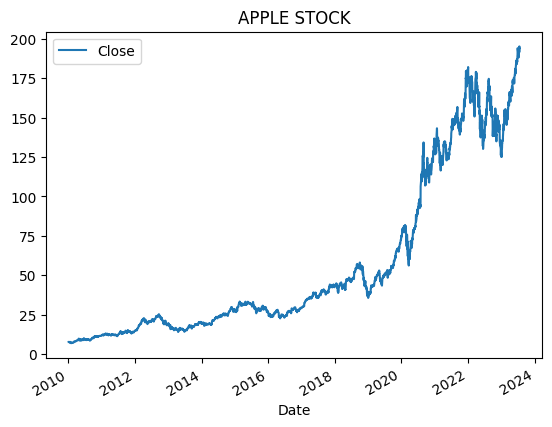

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time

#import yahoo finance library
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance


try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")

#download historical data
df = yf.download('AAPL',
                 start = '2010-01-01',
                 end = date.today(),
                 progress = False,)

#creating simple chart
df.plot(y='Close' , title = 'APPLE STOCK')
plt.show()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2010-05-26,8.931429,9.004643,8.705357,8.718214,7.409982,850654000,38.355163,41.457509,45.711120,-56.178575,5.938006,69.276664
2010-05-27,8.950000,9.067500,8.896786,9.048214,7.690464,666282400,88.107545,57.073471,53.064089,-13.311516,36.745689,85.860512
2010-05-28,9.263929,9.264286,9.048214,9.174286,7.797619,815614800,92.643850,61.634753,55.541488,21.097389,61.682818,98.414024
2010-06-01,9.274643,9.497857,9.248571,9.315357,7.917522,876472800,96.031538,66.308343,58.200193,61.746178,92.576151,113.435571
2010-06-02,9.447857,9.457143,9.297500,9.426786,8.012230,688548000,97.702794,69.708792,60.223610,66.720387,95.928354,114.272333


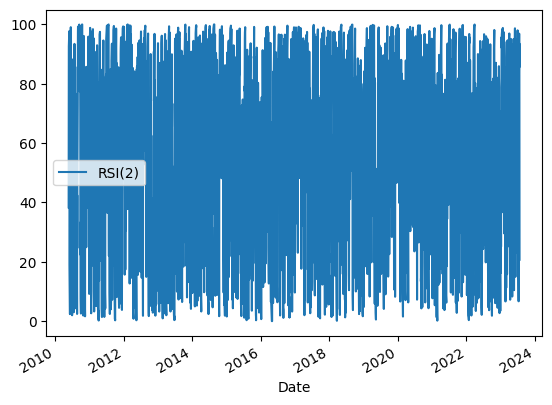

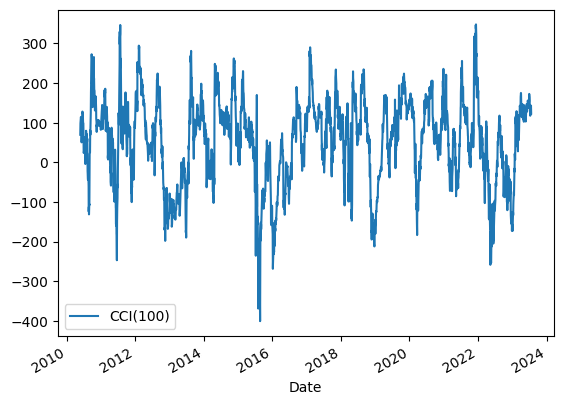

In [ ]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta

df['RSI(2)'] = ta.rsi(df['Close'], length = 2)
df['RSI(7)'] = ta.rsi(df['Close'], length = 7)
df['RSI(14)'] = ta.rsi(df['Close'], length = 14)
df['CCI(30)'] = ta.cci(close = df['Close'], length = 30, high = df['High'], low = df['Low'])
df['CCI(50)'] = ta.cci(close = df['Close'], length = 50, high = df['High'], low = df['Low'])
df['CCI(100)'] = ta.cci(close = df['Close'], length = 100, high = df['High'], low = df['Low'])

#drop NaN values
df = df.dropna()

#create plot showing some of our indicators
df.plot(y = 'RSI(2)')
df.plot(y = 'CCI(100)')

df.head()


Prepare Data Labelling

Plan of Action

place Our Buy at Open (Over the next day).
We want to close our trade: At the next day at open.

Handling the returns this vays: Buy: open(-1) - closing: open(-2)

we want to label our data in following day.]

BUY : open(-2) > open(-1)

SELL : open(-2) < open(-1)

Indicators the current situation and our labels take a look ahead of time
to determine if have a pattern.



In [ ]:
import numpy as np
df['LABEL'] = np.where(df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,
2010-05-26,8.931429,9.004643,8.705357,8.718214,7.409982,850654000,38.355163,41.457509,45.711120,-56.178575,5.938006,69.276664,1
2010-05-27,8.950000,9.067500,8.896786,9.048214,7.690464,666282400,88.107545,57.073471,53.064089,-13.311516,36.745689,85.860512,1
2010-05-28,9.263929,9.264286,9.048214,9.174286,7.797619,815614800,92.643850,61.634753,55.541488,21.097389,61.682818,98.414024,1
2010-06-01,9.274643,9.497857,9.248571,9.315357,7.917522,876472800,96.031538,66.308343,58.200193,61.746178,92.576151,113.435571,1
2010-06-02,9.447857,9.457143,9.297500,9.426786,8.012230,688548000,97.702794,69.708792,60.223610,66.720387,95.928354,114.272333,0


Creating a Neural Network

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

x = df[df.columns[6:-1]].values
y = df['LABEL'].values

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.3)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation = 'relu' , solver = 'adam' , max_iter = 1000)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

from sklearn.metrics import confusion_matrix , classification_report

print('Train Data Accuracy')
print(classification_report(y_train,predict_train))

print('Testing Data Accuracy')

print(classification_report(y_test,predict_test))



Train Data Accuracy
              precision    recall  f1-score   support

           0       0.59      0.33      0.43      1074
           1       0.58      0.80      0.67      1243

    accuracy                           0.58      2317
   macro avg       0.59      0.57      0.55      2317
weighted avg       0.59      0.58      0.56      2317

Testing Data Accuracy
              precision    recall  f1-score   support

           0       0.47      0.29      0.36       445
           1       0.56      0.73      0.64       549

    accuracy                           0.53       994
   macro avg       0.51      0.51      0.50       994
weighted avg       0.52      0.53      0.51       994



Backtesting Our Model

[]

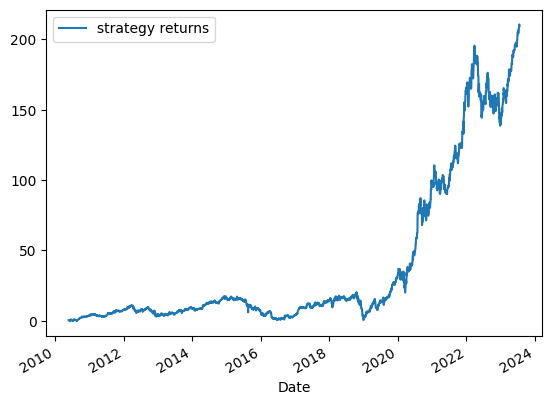

In [ ]:
df['Prediction'] = np.append(predict_train,predict_test)
df['strategy returns'] = np.where(df['Prediction'].eq("1"),df['Open'].shift(-2)-df['Open'].shift(-1),0)

df['strategy returns'] = df['strategy returns'].cumsum()
df.plot(y='strategy returns')
plt.plot()

In [ ]:
prediction = df.iloc[-1]['Prediction']

if prediction == "1":
  print("Today prediction forcast is : UP")
else:
    print("Today prediction forcast is : DOWN")


Today prediction forcast is : DOWN
